### 4.3 수치 미분

#### 4.3.1 미분
 미분이란 한 순간의 변화량을 표시한 것으로 수식은 다음과 같다
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch4_1.PNG?raw=true)
다음은 수치미분의 나쁜 예이다.


In [ ]:
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h


In [ ]:
import numpy as np
import matplotlib.pylab as plt
np.float32(1e-50)

첫번째 개선은 h값을 무한히 작게 하고 싶어서 작은 값은 이용했지만 이 값은 소수점 아래 0이 49개라는 의미이다. 이 방식은 반올림 오차를 일으키기 때문에 파이썬에서는 이 값은 0이 된다. 그러므로 미세 값으로 $10^{-4}$을 사용하자. $10^{-4}$ 정도의 값을 사용해도 충분히 좋은 결과 값을 얻는다고 알려져 있다.  
두번째 개선은 함수 f의 차분에 관련한 것으로 $x+h$와 $x$사이의 함수 f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실에 주의해야한다. 진정한 미분은 함수 f의 기울기(접선)에 해당하지만 이번 구현에서의 미분은 $(x+h)$와 $x$사이의 기울기에 해당한다. 그래서 진정한 미분과 이번 구현의 값은 엄밀히는 일치하지 않는다. 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계이다.  
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch4_2.PNG?raw=true)

수치미분에는 그림 4-5와 같이 어쩔 수 없는 오차가 포함된다. 이 오차를 줄이기 위해서 $(x+h)$와 $(x-h)$일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다. 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심차분 혹은 중앙차분이라고 한다.  
이 두가지 개선점을 적용해서 수치 미분을 구해보자

In [ ]:
def numerial_diff(f,x):
    h=1e-2 # 0.0001
    return (f(x+h)-f(x-h))/(2*h)

### Note
 아주 작은 차분으로 미분을 하는 것을 수치 미분이라고 한다. 한편 수식을 전개해 미분하는 것을 해석학적(analytic)이라는 말을 사용해서 '해석적 해'라고 표현한다.  
 ex) $y=x^2$의 해석적 미분은 $y'=2x$로 풀어낼 수 있다.그래서 $x=2$일때 y의 미분은 4가 된다.
  

### 4.3.2 수치미분의 예


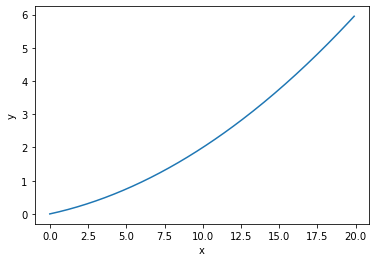

In [ ]:
%precision %.5f

def function_1(x):
    return 0.01*x**2+0.1*x

x=np.arange(0.0, 20.0, 0.1)
y=function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show()

x=5, x=10일 때의 이 함수의 미분을 계산해보자

In [ ]:
print() #0.1999999999990898
print(numerical_diff(function_1, 10)) #0.2999999999986347


0.0


이렇게 계산한 미분 값이 $x$에 대한 $f(x)$에 대한 변화량입니다 즉 함수의 기울기에 해당한다. 

### 4.3.3 편미분
인수들의 제곱합을 계산하는 단순식.  앞의 예와 달리 변수가 2개라는 점에 주의하자
$$f(x_0, x_1)=x^{2}_{0} + x^{2}_{1}$$  
이 식을 파이썬으로 구현하면


In [ ]:
def function_2(x):
    return x[0]**2+x[1]**2

인수 x는 numpy 배열이라고 가정한다. 이 함수를 그래프로 그리면 다음과 같다
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch4_3.PNG?raw=true)  

이 수식은 변수가 두개로  $x_0$로 미분하냐 혹은 $x_1$으로 미분 할 수 있다. 이렇게 어느 변수에 대한 미분이냐를 구분해야한다. 이렇게 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다. 편미분을 수식으로는 ![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch4_4.PNG?raw=true)
처럼 쓴다. 편미분은 어떻게 구할까?

In [ ]:
def function_tmp1(x0):
    return x0*x0+ 4.0**2.0

def function_tmp2(x1):
    return 3.0**2.0+ x1*x1


In [ ]:
print(numerical_diff(function_tmp1, 3.0)) #6.00000000000378
print(numerical_diff(function_tmp2, 4.0)) #7.999999999999119

0.0
0.0


이 문제들은 변수가 하나인 함수를 정의하고 그 함수를 미분하는 형태로 구현하여 풀었습니다. 예를들어 문제 1에서는 $x_{1}=4$로 고정된 새로운 함수를 정의하고, 변수가 $x_0$ 하나뿐인 함수에 대해 수치 미분 함수를 적용하였습니다. 이렇게 구한 문제 1의 결과는 6.000000000378, 문제 2의 결과는 7.99999999119입니다. 보다시피 해석적 미분의 결과와 거의 같다.  
이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 고정한다. 